In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'stixgeneral'
import numpy as np

import camb

In [21]:
lm = 5000

In [22]:
def get_lensing_camb(_ns):
    pars = camb.set_params(H0 = 67.4, ns=_ns, lmax=lm)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:lm, 0]
    unlensed = powers['unlensed_total'][2:lm, 0]
    return lensed/unlensed

In [23]:
_ns = [0.5, 0.8, 0.965, 1.2]
ells = np.array([l for l in range(2, lm)])
n = len(_ns)
lensings_camb = [get_lensing_camb(_ns[i]) for i in range(n)]
label_key = ["$A_s$ = " + str(_ns[i]) for i in range(n)]
fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [43]:
def lensing_tail_fit(ell, ns):
    #expected form of the lensing tail function for curve fitting
    x6 = ns / 0.965 - 1
    beta1 = 0.6838
    beta2 = 2803.1562 
    beta3 =  3752.098 * ( 1 + -0.30258765 * x6)
    beta4 = 407.009  * (1 + -1.076944 * x6)
    alpha = 2.5867 * ( 1 + 0.07185047 * x6)
    sigma = (1 + np.exp(-(ell - beta3)/beta4))**-1
    poly = (beta1 * (ell/beta2)**alpha -1)
    
    return (poly*sigma + 1).flatten() 

In [44]:
lensings_fit = [lensing_tail_fit(ells, _ns[i]) for i in range(n)]

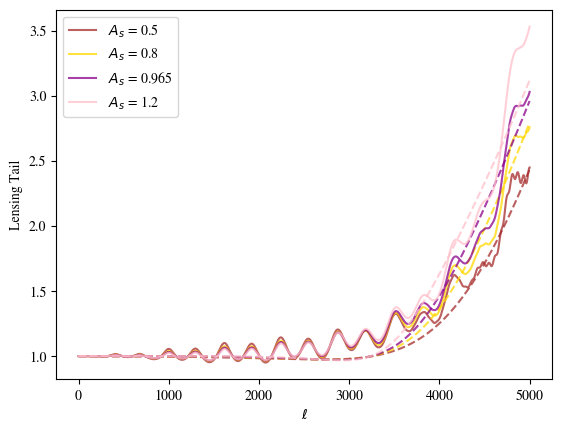

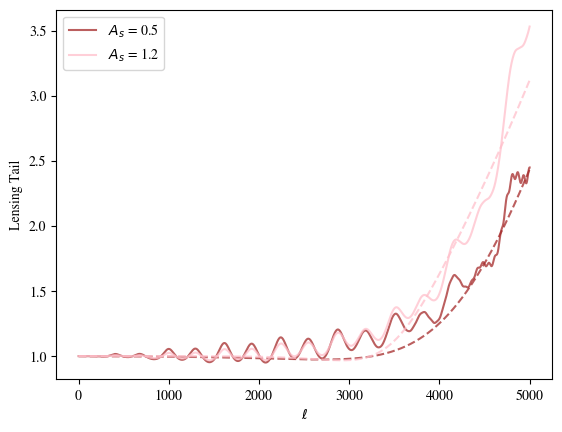

In [45]:
color_key = ["brown","gold","darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen", "crimson", "blue", "lime"]
for i in range(n):
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
#plt.ylim(0.9,3)
plt.legend()
plt.show()
for i in [0,3]: 
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.legend()
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
plt.show()